## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

%matplotlib inline




To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20,50)
y = -2*x+1
x = x[:,np.newaxis]
y = y[:,np.newaxis]




#### Plot your data points. 

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [3]:
def initialize_weights(col_dim,row_dim=1):
    return np.random.normal(size=(row_dim,col_dim))*0.01

In [4]:
def initialize_bias(weights_array):
    return np.insert(weights_array,0,0)

In [5]:
def initialize_theta(features_number):
    weights = initialize_weights(features_number)
    return initialize_bias(weights).reshape([-1,1])

In [6]:
def predict(input_data,weights):
    return np.matmul(input_data,weights)

In [7]:
def calc_mean_square_error(sample_number,output,predicted):
    return (1/(2*sample_number))*np.sum(np.power((predicted-output),2))

In [8]:
def calc_gradient(number_of_samples,predicted,output,input):
    return (1/number_of_samples)*np.sum((predicted-output)*input)

In [9]:
def calc_new_weights(weights,d_theta,lr):
    return (weights - (lr*d_theta))

In [10]:
def split_data(training_data,real_output,samples_number,batches):
    samples_per_batch = samples_number//batches
    data_batches = {}
    batch_data ={}
    current_batch_start_index = 0
    current_batch_end_index = samples_per_batch
    for batch in range(1,batches+1):
        batch_data["training_batch_data"] = training_data[current_batch_start_index:current_batch_end_index]
        batch_data["real_output"] = real_output[current_batch_start_index:current_batch_end_index]
        data_batches[batch] = batch_data.copy()
        current_batch_start_index += samples_per_batch
        if batch == batches:
            current_batch_end_index = len(training_data)
        else:
            current_batch_end_index += samples_per_batch
    return data_batches

In [11]:
def prepare_theta_history(theta_matrix):
    theta_dict = {}
    for _,matrix in theta_matrix.items():
        for index,theta in enumerate(matrix):
            if "theta_"+str(index) in theta_dict.keys():
                theta_dict["theta_"+str(index)].append(theta)
            else:
                theta_dict["theta_"+str(index)] = [theta]
    return theta_dict

In [12]:
def solve_using_gradient_descent(training_data,real_output,epochs,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data_batch,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix = calc_new_weights(theta_matrix,d_theta,lr)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    predicted_output = predict(training_data,theta_matrix)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

In [13]:
def print_theta(fig,cost_history,theta_history):
    index = 413
    for key,value in theta_history.items():
        ax = fig.add_subplot(index)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.plot(value,np.array(list(cost_history.values())).flatten(),"-r",label="predicted output")
        ax.set_xlabel("loss")
        ax.set_ylabel(key)
        ax.grid()
        ax.legend()
        index += 1

In [14]:
def prepare_input_data_for_training(data):
    if len(data.shape)<2:
        data = data[:,np.newaxis]
    return np.insert(data,0,1,axis=1)

In [15]:
def print_graph(fig,raw_input_data,predicted_output,raw_output_data):
    ax1 = fig.add_subplot(411)
    ax1.xaxis.label.set_color('white')
    ax1.yaxis.label.set_color('white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.plot(raw_input_data,raw_output_data,"bo",label="true output")
    ax1.plot(raw_input_data,predicted_output,"-r",label="predicted output")
    ax1.set_xlabel("input")
    ax1.set_ylabel("output")
    ax1.grid()
    ax1.legend()

In [16]:
def print_debug_graph(fig,history):
    ax2 = fig.add_subplot(412)
    ax2.xaxis.label.set_color('white')
    ax2.yaxis.label.set_color('white')
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.plot(np.array(list(history.values())).flatten(),"-bo",label="true output")
    ax2.set_xlabel("Batches")
    ax2.set_ylabel("Cost")
    ax2.grid()
    ax2.legend()

Epoch:1 of 100, Batch: 1
Cost: 247.9495223001825, Gradient: 277.3044478198473
R2 Score: -1.5514302952046921
Epoch:2 of 100, Batch: 1
Cost: 177.0380204835909, Gradient: 234.12984307663072
R2 Score: -0.8229233048566964
Epoch:3 of 100, Batch: 1
Cost: 126.48855584719936, Gradient: 197.67725995761816
R2 Score: -0.3036050362744356
Epoch:4 of 100, Batch: 1
Cost: 90.4542270067976, Gradient: 166.90012085115544
R2 Score: 0.06659246032672816
Epoch:5 of 100, Batch: 1
Cost: 64.76705377324744, Gradient: 140.91479387210518
R2 Score: 0.33048879284725574
Epoch:6 of 100, Batch: 1
Cost: 46.455879679986346, Gradient: 118.97522320985433
R2 Score: 0.518608039890176
Epoch:7 of 100, Batch: 1
Cost: 33.402707436191875, Gradient: 100.45150937581397
R2 Score: 0.652709377222109
Epoch:8 of 100, Batch: 1
Cost: 24.097716682547542, Gradient: 84.81182437524077
R2 Score: 0.7483038948320475
Epoch:9 of 100, Batch: 1
Cost: 17.464627705531406, Gradient: 71.60714257608342
R2 Score: 0.8164487170902874
Epoch:10 of 100, Batch: 

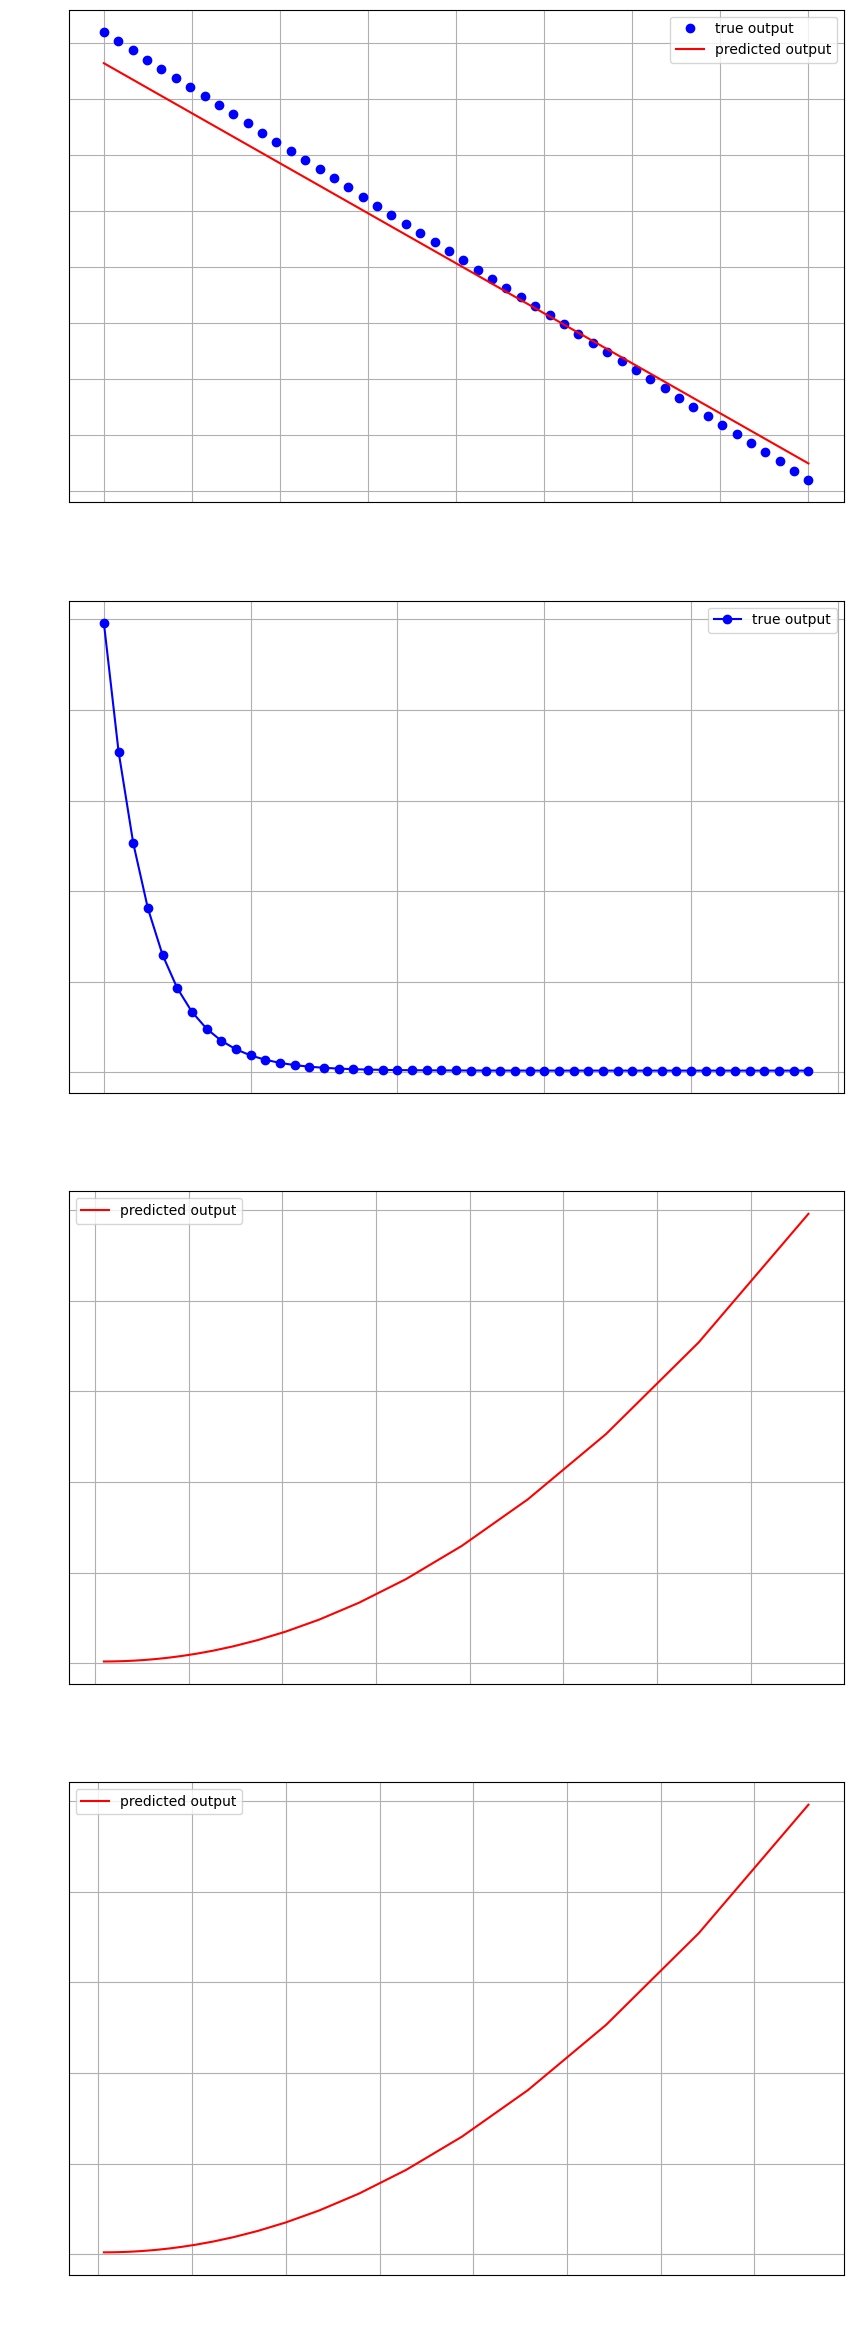

In [17]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_gradient_descent(prepared_input_data,raw_output_data,100,0.001,1)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])





### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

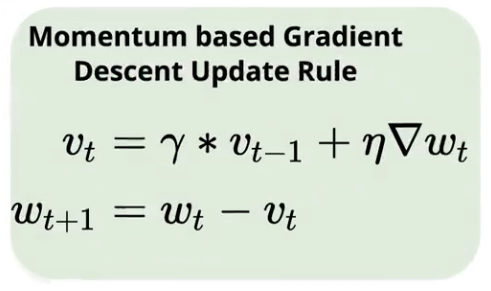

#### γ takes values between 0 and 1.
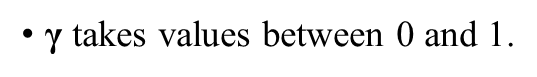

In [18]:

def calc_new_momentum_weights(weights,d_theta,lr,gamma,momentum):
    momentum = ((gamma*momentum)+(lr*d_theta))
    return (weights - momentum),momentum

In [19]:
def solve_using_momentum_gradient_descent(training_data,real_output,epochs,gamma,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    momentum = 0
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data_batch,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,momentum = calc_new_momentum_weights(theta_matrix,d_theta,lr,gamma,momentum)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

Epoch:1 of 500, Batch: 1
Cost: 250.58863189591116, Gradient: 278.7784502382969
R2 Score: -1.5785712607093516
Epoch:2 of 500, Batch: 1
Cost: 178.92127115126118, Gradient: 235.37435234303223
R2 Score: -0.1943399025557806
Epoch:3 of 500, Batch: 1
Cost: 82.87256466713582, Gradient: 159.66431864494723
R2 Score: 0.7798239310746833
Epoch:4 of 500, Batch: 1
Cost: 15.277523149919935, Gradient: 66.66653144029725
R2 Score: 0.9507475574856062
Epoch:5 of 500, Batch: 1
Cost: 3.4175164193661, Gradient: -27.411047826704653
R2 Score: 0.44755137600072836


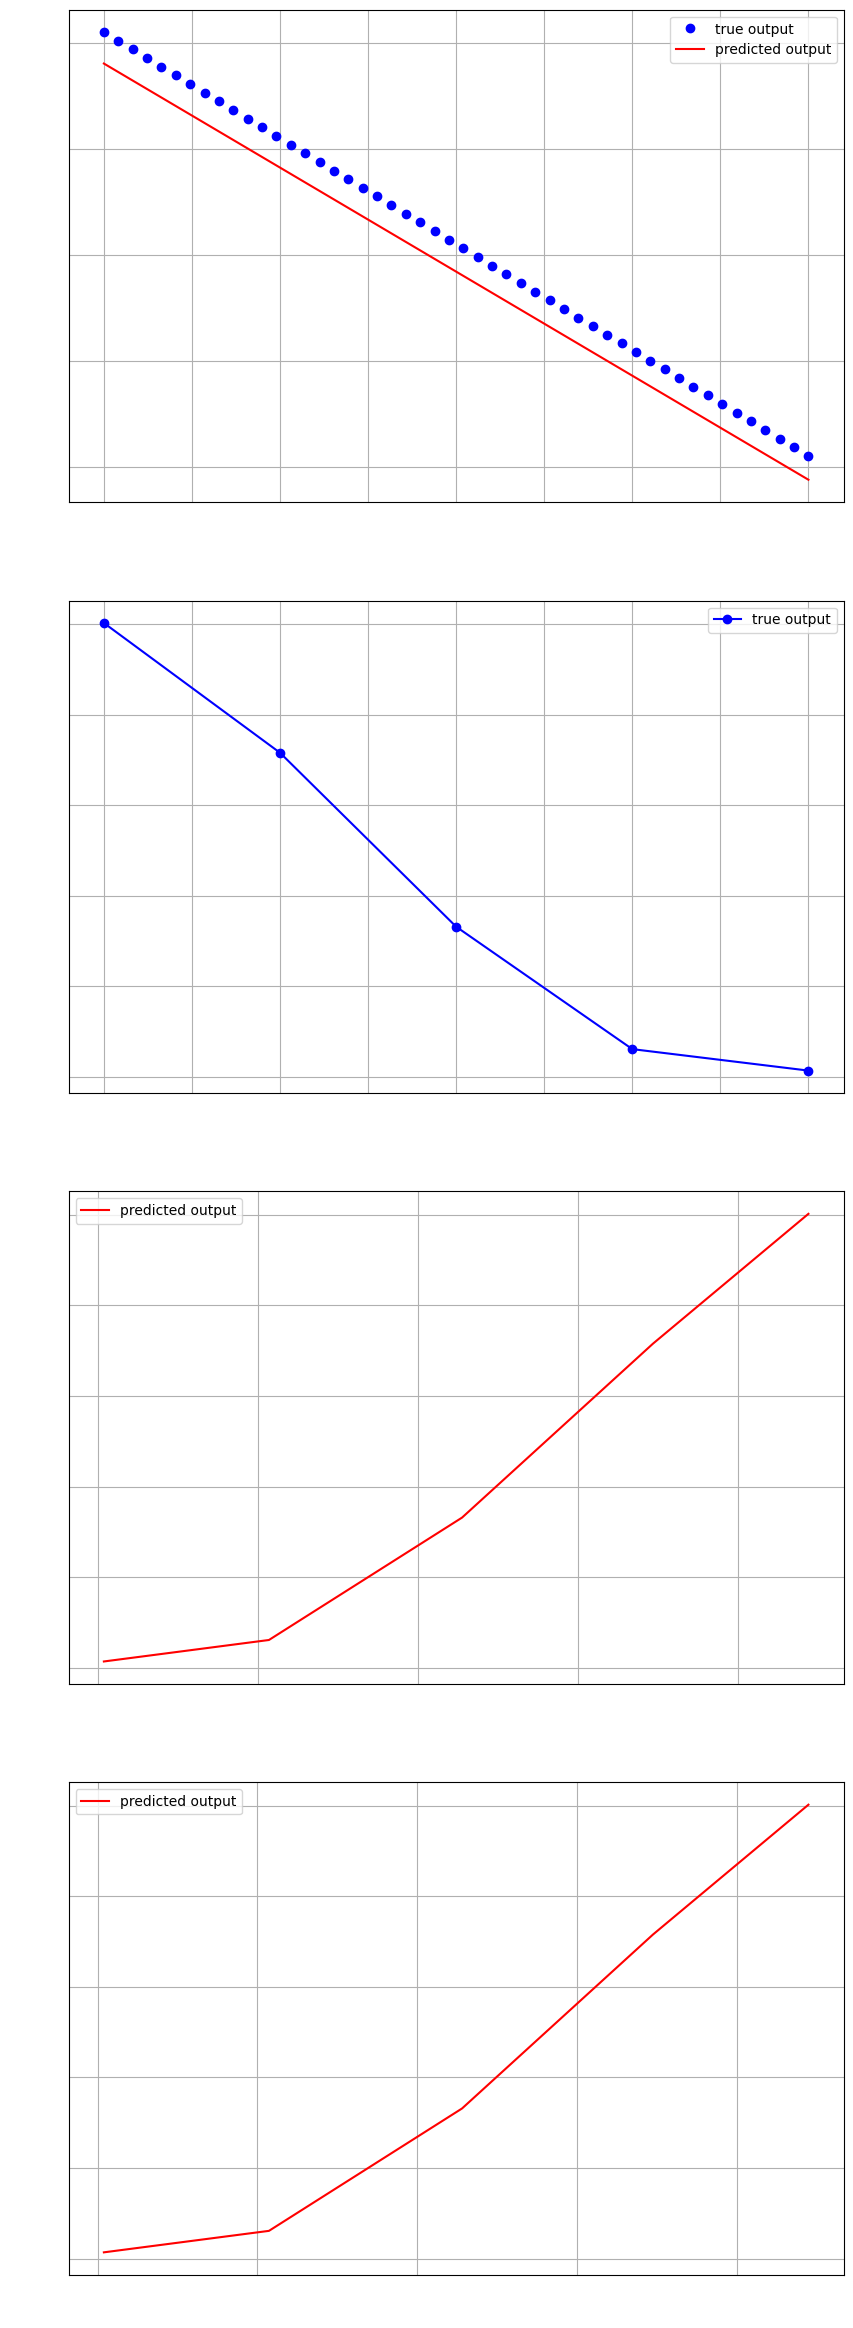

In [20]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_momentum_gradient_descent(prepared_input_data,raw_output_data,500,0.9,0.001)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

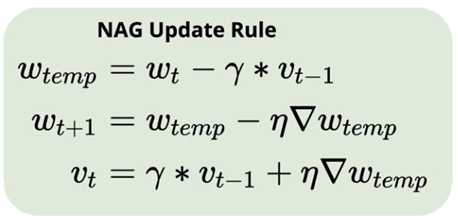

In [21]:

def calc_temp_weights(weights,gamma,momentum):
    return (weights - (gamma*momentum))

In [22]:
def calc_new_nesterov_weights(temp_weights,temp_d_theta,lr,gamma,momentum):
    momentum = ((gamma*momentum)+(lr*temp_d_theta))
    return (temp_weights - (lr*temp_d_theta)),momentum

In [23]:
def nesterov_acceleration_weight_update(theta_matrix,gamma,lr,momentum,training_data_batch,batch_samples_number,real_output_data_batch):
    temp_theta_matrix = calc_temp_weights(theta_matrix,gamma,momentum)
    temp_predicted_output = predict(training_data_batch,temp_theta_matrix)
    temp_d_theta = calc_gradient(batch_samples_number,temp_predicted_output,real_output_data_batch,training_data_batch)
    return calc_new_nesterov_weights(temp_theta_matrix,temp_d_theta,lr,gamma,momentum)

In [24]:
def solve_using_nesterov_accelerated_gradient_descent(training_data,real_output,epochs,gamma,lr=0.0001,batches=1):
    cost_history = {}
    theta_history = {}
    momentum = 0
    epoch_index = 0
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,real_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,momentum = nesterov_acceleration_weight_update(theta_matrix,gamma,lr,momentum,training_data_batch,batch_samples_number,real_output_data_batch)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\nCost: {cost}, Gradient: {d_theta}")
        print(f"R2 Score: {r2_score(real_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (d_theta <= 0.00001 or sum(theta_history[batch+epoch_index-2]-theta_matrix)/len(theta_matrix) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"predicted_output":predicted_output,"epochs_history":cost_history,"theta_history":theta_history}

Epoch:1 of 500, Batch: 1
Cost: 246.39897852073537, Gradient: 276.4347720778889
R2 Score: -1.5354842649738036
Epoch:2 of 500, Batch: 1
Cost: 175.9315612430803, Gradient: 233.3955705231499
R2 Score: -0.264495043219807
Epoch:3 of 500, Batch: 1
Cost: 87.74047238668051, Gradient: 164.35287390498442
R2 Score: 0.6409792679302029
Epoch:4 of 500, Batch: 1
Cost: 24.911642633414505, Gradient: 86.3002833614693
R2 Score: 0.9771762269490949
Epoch:5 of 500, Batch: 1
Cost: 1.5836903749607603, Gradient: 13.553605549166553
R2 Score: 0.8967462838094248
Epoch:6 of 500, Batch: 1
Cost: 7.164543572407261, Gradient: -43.83502677185577
R2 Score: 0.6848740668084465


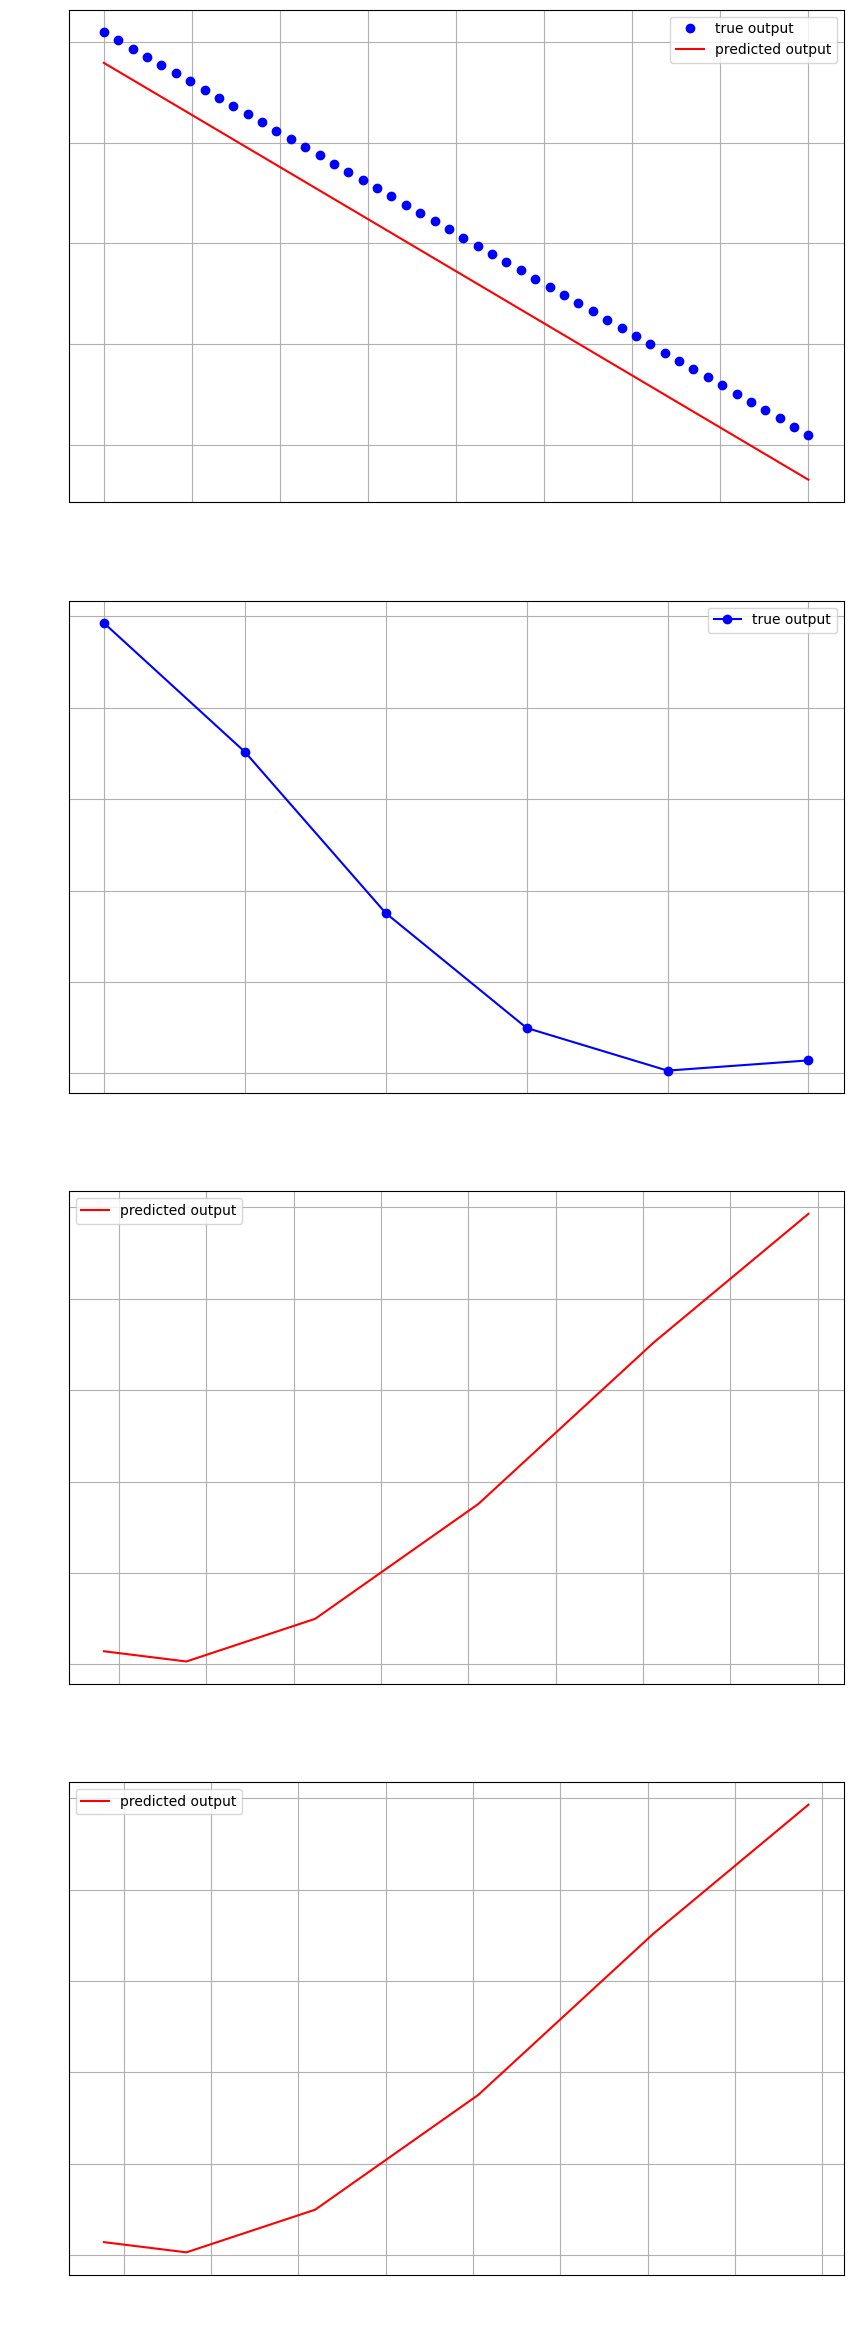

In [25]:
if __name__ == "__main__":
    raw_input_data = x
    raw_output_data = y
    prepared_input_data = prepare_input_data_for_training(raw_input_data)
    model_results = solve_using_nesterov_accelerated_gradient_descent(prepared_input_data,raw_output_data,500,0.9,0.001)
    fig = plt.figure(figsize=(10, 30), dpi=100)
    print_graph(fig,raw_input_data,model_results["predicted_output"],raw_output_data)
    print_debug_graph(fig,model_results["epochs_history"])
    print_theta(fig,model_results["epochs_history"],model_results["theta_history"])


## Congratulations 
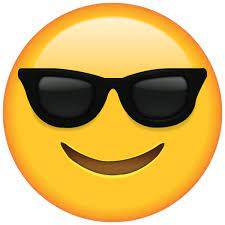